95% Confidence Interval: [1.23, 1.31]
95% Confidence Interval: [200453.86, 207791.57]


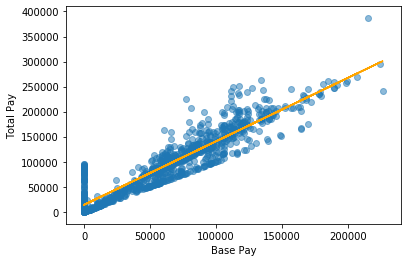

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def standard_units(array_of_numbers): #Converts an array to standard units
    return (array_of_numbers-np.mean(array_of_numbers))/np.std(array_of_numbers)

def correlation(x,y): #x and y are columns in a df. 
    return np.mean(standard_units(x)*standard_units(y))

def reg_slope(x,y): #x and y are columns in a df.
    return (correlation(x,y)*(np.std(y)/np.std(x)))

def reg_intercept(x,y): #x and y are columns in a df.
    return np.mean(y)-reg_slope(x,y)*(np.mean(x))

def fitted_value(x,y,given_x): #x and y are columns in a df.
    return reg_slope(x,y)*given_x+reg_intercept(x,y)
    
salaries = pd.read_csv("salaries.csv")

def convert_float(entry):
    if type(entry)==type('a'):
        return 0.0
    else:
        return entry  
    
salaries['BasePay'] = salaries['BasePay'].apply(lambda x: convert_float(x))
salaries['OvertimePay'] = salaries.OvertimePay.apply(lambda x: convert_float(x))

sal=salaries.sample(1000).reset_index()

bootstrapped_slopes=[]
bootstrapped_predictions=[]
for i in range(1000):
    sample=sal.sample(1000, replace=True)
    bootstrapped_slopes.append(reg_slope(sample.BasePay,sample.TotalPayBenefits))
    bootstrapped_predictions.append(fitted_value(sample.BasePay,sample.TotalPayBenefits, 150000))

Con_int_95_slopes = [round(np.percentile(bootstrapped_slopes,2.5),2), round(np.percentile(bootstrapped_slopes,97.5),2)]
print("95% Confidence Interval: " +str(Con_int_95_slopes))

#Since the 95 Percent confidence interval does not contain 0, we may conclude with 95 percent certainty that the 
#True line does not have slope 0 and therefore the regression line is a good approximation of the True line.

Con_int_95_predictions = [round(np.percentile(bootstrapped_predictions,2.5),2), round(np.percentile(bootstrapped_predictions,97.5),2)]
print("95% Confidence Interval: " +str(Con_int_95_predictions))
    



#Correlation Coefficient
r=correlation(sal.BasePay, sal.TotalPayBenefits)
#print(r)

#slope of regression line
m_reg=reg_slope(sal.BasePay,sal.TotalPayBenefits)

#y-intercept of regression line
b_reg=reg_intercept(sal.BasePay,sal.TotalPayBenefits)

#salaries['Reg_Errors']=(salaries.TotalPayBenefits-(m_reg*(salaries.BasePay)+b_reg))



x=sal.BasePay

plt.plot(x, m_reg*x+b_reg, color='orange')



plt.scatter(sal['BasePay'], sal['TotalPayBenefits'], alpha=0.5)
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.show()

